In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
#as data was not having labels created own dataset with provided datapoints.
#As the is to predict intent, so only taken messages column from provided data in consideration.
#manually labeled targets
#as manual labeling will take too much time labeled only for few data points.


In [10]:
data = pd.ExcelFile("Book1.xlsx")

In [11]:
print(data.sheet_names)

['Sheet1', 'Sheet2']


In [12]:
df = data.parse('Sheet1') 
test_df= data.parse('Sheet2')
print(df)
print(test_df)

                                                  Message   intent
0        Youre about to GET LUCKY! Rise and shine. HAP...      NaN
1        Rest up, tomorrows a BIG DAY.\r\n You&#039;re...  neutral
2        Start PRESSING with FORWARD moving people!\r\...      NaN
3                                                     NaN      NaN
4        You have a habit of waking up every morning t...  neutral
...                                                   ...      ...
203674                           i want sell this page .    seller
203675   Hello Guys !!!\n I want to Buy Fresh US Email...    buyer
203676       Anybody with good cc inbox me I want to buy     buyer
203677   American diamond Rings , Price on Pics , Best...   seller
203678   Do you want to buy Organic Dry Fruits for the...    buyer

[203679 rows x 2 columns]
                                              Message            intent
0    Making Money Online may not be easy, but its ...           neutral
1    For some this is UUU

In [13]:
print(df.describe())
print(test_df.describe())

       Message  intent
count   195185     203
unique  161398       4
top             seller
freq      7469      86
                                                  Message  intent
count                                                  29      29
unique                                                 28       4
top      I am selling a very good plot with the total ...  seller
freq                                                    2      10


In [14]:
#Check for null
print(df.isnull().sum())
print(test_df.isnull().sum())

Message      8494
intent     203476
dtype: int64
Message    0
intent     0
dtype: int64


In [15]:
#drop if any
df = df.dropna() 
  
# To reset the indices  
df = df.reset_index(drop = True) 

In [16]:
df['Message']

0       Rest up, tomorrows a BIG DAY.\r\n You&#039;re...
1       You have a habit of waking up every morning t...
2       RIPE for the picking and GREAT for your PORTF...
3       Merry Morning and Happy Wednesday Winners!!\r...
4       Clebrating with great team members and leader...
                             ...                        
198                             i want sell this page . 
199     Hello Guys !!!\n I want to Buy Fresh US Email...
200         Anybody with good cc inbox me I want to buy 
201     American diamond Rings , Price on Pics , Best...
202     Do you want to buy Organic Dry Fruits for the...
Name: Message, Length: 203, dtype: object

In [17]:
#check for target frequency for each class
print(df.groupby("intent").count())
print(test_df.groupby("intent").count())

                  Message
intent                   
buyer                  62
buyer and seller       12
neutral                43
seller                 86
                  Message
intent                   
buyer                   7
buyer and seller        4
neutral                 8
seller                 10


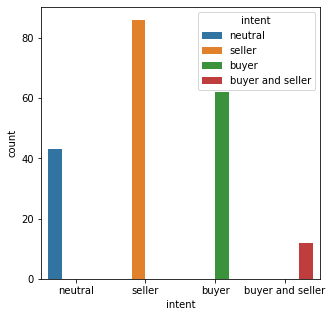

In [18]:
#density plot 
fig,ax = plt.subplots(1,1, figsize=(5,5))
sns.countplot(x= df['intent'],hue='intent', data=df,ax = ax)
    

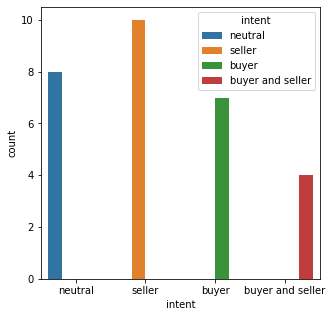

In [19]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
sns.countplot(x= test_df['intent'],hue='intent', data=test_df,ax = ax)

In [20]:
#Checks number of unique rows & columns
print(df.nunique())
print(test_df.nunique())

Message    202
intent       4
dtype: int64
Message    28
intent      4
dtype: int64


In [21]:
#remove digits
df['Message'] =df['Message'].str.replace('\d+', '')
test_df['Message'] =test_df['Message'].str.replace('\d+', '')

In [22]:
#data cleaning
#removing all newlines, spaces, special chars etc..
punc = '''!()-[]{};:`+=-)˝˙ˇ ˜˚˚'"\/,<>/?#$%^&* .._~\n\r'''

for i in range(len(df)):
    for ele in df['Message'][i]:
        ele.join(re.sub(r'\b\d+\b','', ele))
        #df['sent'][i] = ''.join([i for i in ele.split() if not i.isdigit()])
        df['Message'][i] = df['Message'][i].lower()
        if ele in punc:
            df['Message'][i] = df['Message'][i].replace(ele, " ")
            df['Message'][i] = df['Message'][i].replace("  ", " ")
            

In [23]:
punc = '''!()-[]{};:`+=-)˝˙ˇ ˜˚˚'"\/,<>/?#$%^&* .._~\n\r'''

for i in range(len(test_df)):
    for ele in test_df['Message'][i]:
        ele.join(re.sub(r'\b\d+\b','', ele))
        test_df['Message'][i] = test_df['Message'][i].lower()
        if ele in punc:
            test_df['Message'][i] = test_df['Message'][i].replace(ele, " ")
            test_df['Message'][i] = test_df['Message'][i].replace("  ", " ")

In [24]:
#text to lower case
df["Message"]= df.Message.map(lambda x: x.lower())
test_df["Message"]= test_df.Message.map(lambda x: x.lower())

data1=df
test_data = test_df

In [25]:
# One hot encoding for target labels
from sklearn.preprocessing import OneHotEncoder as OHE

y_encoder= OHE().fit(np.array(df.intent).reshape(-1,1))
y_encoder.categories_

[array(['buyer', 'buyer and seller', 'neutral', 'seller'], dtype=object)]

In [26]:
ytr_encoded= y_encoder.transform(np.array(df.intent).reshape(-1,1)).toarray()
yts_encoded= y_encoder.transform(np.array(test_df.intent).reshape(-1,1)).toarray()

print(yts_encoded)


[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [27]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PatilPra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# adding new column "lower_text" with lower case text
df["lower_text"]= df.Message.map(lambda x: x.lower())
test_df["lower_text"]= test_df.Message.map(lambda x: x.lower())


In [29]:
# adding new column "tokenized" with tokens.
df["tokenized"]= df.lower_text.map(word_tokenize)
test_df["tokenized"]= test_df.lower_text.map(word_tokenize)

In [30]:
# removing stop words
from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed= [s for s in strings if s not in stop_list]
    return classed

stop= stopwords.words("english")
stop_punc= list(set(punctuation))+ stop

df["selected"] = df.tokenized.map(lambda df: remove_stop(df, stop_punc))
test_df["selected"] = test_df.tokenized.map(lambda test_df: remove_stop(test_df, stop_punc))


In [31]:
#perform stemming
from nltk.stem import PorterStemmer

def normalize(text):
    return " ".join(text)

stemmer= PorterStemmer()

df["stemmed"]= df.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
df["normalized"]= df.stemmed.apply(normalize)
test_df["stemmed"]= test_df.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
test_df["normalized"]= test_df.stemmed.apply(normalize)

test_df

,Message,intent,lower_text,tokenized,selected,stemmed,normalized
0,making money online may not be easy but its n...,neutral,making money online may not be easy but its n...,"[making, money, online, may, not, be, easy, bu...","[making, money, online, may, easy, hard, eithe...","[make, money, onlin, may, easi, hard, either, ...",make money onlin may easi hard either discov s...
1,for some this is uuuugely difficult but very ...,neutral,for some this is uuuugely difficult but very ...,"[for, some, this, is, uuuugely, difficult, but...","[uuuugely, difficult, important, get, want, li...","[uuuug, difficult, import, get, want, life, ke...",uuuug difficult import get want life keep keep...
2,bitcoin is changing the world resistance is f...,neutral,bitcoin is changing the world resistance is f...,"[bitcoin, is, changing, the, world, resistance...","[bitcoin, changing, world, resistance, futile,...","[bitcoin, chang, world, resist, futil, free, t...",bitcoin chang world resist futil free train am...
3,open plots for sales at shamshabad free site ...,seller,open plots for sales at shamshabad free site ...,"[open, plots, for, sales, at, shamshabad, free...","[open, plots, sales, shamshabad, free, site, v...","[open, plot, sale, shamshabad, free, site, vis...",open plot sale shamshabad free site visit ac c...
4,i am selling a very good plot with the total ...,seller,i am selling a very good plot with the total ...,"[i, am, selling, a, very, good, plot, with, th...","[selling, good, plot, total, area, sqft, akbar...","[sell, good, plot, total, area, sqft, akbar, p...",sell good plot total area sqft akbar pura area...
5,i am selling a very good plot with the total ...,seller,i am selling a very good plot with the total ...,"[i, am, selling, a, very, good, plot, with, th...","[selling, good, plot, total, area, sqft, akbar...","[sell, good, plot, total, area, sqft, akbar, p...",sell good plot total area sqft akbar pura area...
6,preparing ginger water is the easiest thing t...,neutral,preparing ginger water is the easiest thing t...,"[preparing, ginger, water, is, the, easiest, t...","[preparing, ginger, water, easiest, thing, hom...","[prepar, ginger, water, easiest, thing, home, ...",prepar ginger water easiest thing home excel r...
7,product name collar neck t shirts tv product ...,seller,product name collar neck t shirts tv product ...,"[product, name, collar, neck, t, shirts, tv, p...","[product, name, collar, neck, shirts, tv, prod...","[product, name, collar, neck, shirt, tv, produ...",product name collar neck shirt tv product deta...
8,hi guys i want to buy skins cs go or account ...,buyer,hi guys i want to buy skins cs go or account ...,"[hi, guys, i, want, to, buy, skins, cs, go, or...","[hi, guys, want, buy, skins, cs, go, account, ...","[hi, guy, want, buy, skin, cs, go, account, cs...",hi guy want buy skin cs go account cs go go fi...
9,i want to buy a knife fair trade only,buyer,i want to buy a knife fair trade only,"[i, want, to, buy, a, knife, fair, trade, only]","[want, buy, knife, fair, trade]","[want, buy, knife, fair, trade]",want buy knife fair trade


In [32]:
#assign each token from normalised column a unique number and apply to all rows.
#all text get converted to respective unique value
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(df.normalized)


tokenized_train= tokenizer.texts_to_sequences(df.normalized)
tokenized_test= tokenizer.texts_to_sequences(test_df.normalized)
tokenized_test

[[64,
  88,
  74,
  333,
  203,
  283,
  433,
  1039,
  64,
  234,
  849,
  1231,
  88,
  74,
  337,
  189,
  10,
  195],
 [47, 3, 415, 1230, 1230, 91, 272, 24, 4],
 [87, 180, 38, 42, 24, 4],
 [67,
  23,
  38,
  375,
  219,
  604,
  57,
  329,
  99,
  389,
  290,
  33,
  1018,
  1201,
  38,
  375,
  219,
  53,
  5,
  67,
  23,
  38,
  375,
  219,
  604,
  57,
  329,
  99,
  389,
  290,
  33,
  1018,
  1201,
  38,
  375,
  219,
  53,
  5],
 [1, 7, 164, 164, 1174, 1177, 1, 8, 1282, 1026],
 [1, 7, 164, 164, 1174, 1177, 1, 8, 1282, 1026],
 [343,
  584,
  70,
  209,
  340,
  964,
  31,
  163,
  925,
  52,
  999,
  5,
  343,
  584,
  70,
  209,
  340,
  964,
  31,
  163,
  925,
  52,
  999,
  5],
 [61,
  83,
  756,
  61,
  29,
  685,
  935,
  105,
  479,
  8,
  29,
  605,
  258,
  605,
  298,
  1405,
  8,
  117,
  99,
  53,
  29,
  395,
  13,
  44,
  804,
  94,
  61,
  83,
  756,
  61,
  29,
  685,
  935,
  105,
  479,
  8,
  29,
  605,
  258,
  605,
  298,
  1405,
  8,
  117,
  99,
  53,
  

In [33]:
#total 1523 unique words are present in dataset
tokenizer.word_index.keys().__len__()

1518

In [34]:
# padding sequences with 0 to make all the sentences to be same length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded= pad_sequences(tokenized_train, maxlen= 25, padding= "pre")
test_padded= pad_sequences(tokenized_test, maxlen= 25, padding= "pre")


In [35]:
test_padded.shape

(29, 25)

In [36]:
#this function transform final processed text (columns padded) into 3D matrix (samples, steps, unique_words)
#matrix contents one hot encoded words. Encoding was done for each step and based on unique words.

def transform_x(data, tokenizer):
    output_shape= [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results= np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed= transform_x(train_padded, tokenizer)
xts_transformed= transform_x(test_padded, tokenizer)

In [37]:
#Model
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as CC
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import he_uniform, glorot_uniform
from tensorflow.keras.metrics import AUC
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from keras.models import load_model



class LSTMModel(object):
    
    def build_model(self, input_dim, output_shape, steps, dropout_rate, kernel_regularizer, bias_regularizer):
        input_layer= Input(shape= (steps, input_dim))
        
        #make lstm_layer
        lstm= LSTM(units= steps)(input_layer)
        dense_1= Dense(output_shape, kernel_initializer= he_uniform(),
                       bias_initializer= "zeros", 
                       kernel_regularizer= l2(l= kernel_regularizer),
                       bias_regularizer= l2(l= bias_regularizer))(lstm)
        x= BatchNormalization()(dense_1)
        x= relu(x)
        x= Dropout(rate= dropout_rate)(x)
        o= Dense(output_shape, kernel_initializer= glorot_uniform(),
                 bias_initializer= "zeros", 
                 kernel_regularizer= l2(l= kernel_regularizer), 
                 bias_regularizer= l2(l= bias_regularizer))(dense_1)
        o= BatchNormalization()(o)
        output= softmax(o, axis= 1)
        
        loss= CC()
        metrics= AUC()
        optimizer= Adam()
        self.model= Model(inputs= [input_layer], outputs= [output])
        self.model.compile(optimizer= optimizer, loss= loss, metrics= [metrics])
        
        
    def train(self, x, y, validation_split, epochs):
        self.model.fit(x, y, validation_split= validation_split, epochs= epochs)
        self.model.save('my_model.h5')
        
    def predict(self, x):
        return self.model.predict(x)
    

In [38]:
steps= xtr_transformed.shape[1]
dim= xtr_transformed.shape[2]
output_shape= ytr_encoded.shape[1]
print(steps)
print(dim)
print(output_shape)
model= LSTMModel()
model.build_model(input_dim= dim,
                  output_shape= output_shape,
                  steps= steps, 
                  dropout_rate= 0.5, 
                  bias_regularizer= 0.3, 
                  kernel_regularizer= 0.3)

25
1518
4


In [39]:
# as dataset is very samll tried for more epochs.
model.train(xtr_transformed, ytr_encoded,
           0.2, 1000)

Epoch 1/1000
6/6 [==============================] - 5s 841ms/step - loss: 5.6129 - auc: 0.5183 - val_loss: 5.3977 - val_auc: 0.5607
Epoch 2/1000
6/6 [==============================] - 0s 60ms/step - loss: 5.1990 - auc: 0.7125 - val_loss: 5.2821 - val_auc: 0.5415
Epoch 3/1000
6/6 [==============================] - 0s 80ms/step - loss: 4.8956 - auc: 0.8477 - val_loss: 5.1693 - val_auc: 0.5736
Epoch 4/1000
6/6 [==============================] - 1s 97ms/step - loss: 4.6385 - auc: 0.9302 - val_loss: 5.0618 - val_auc: 0.6106
Epoch 5/1000
6/6 [==============================] - 0s 63ms/step - loss: 4.4469 - auc: 0.9627 - val_loss: 4.9576 - val_auc: 0.6208
Epoch 6/1000
6/6 [==============================] - 1s 92ms/step - loss: 4.2813 - auc: 0.9718 - val_loss: 4.8568 - val_auc: 0.5920
Epoch 7/1000
6/6 [==============================] - 0s 66ms/step - loss: 4.1016 - auc: 0.9816 - val_loss: 4.7584 - val_auc: 0.5592
Epoch 8/1000
6/6 [==============================] - 0s 77ms/step - loss: 3.9477 - 

Epoch 63/1000
6/6 [==============================] - 1s 137ms/step - loss: 0.9315 - auc: 0.9999 - val_loss: 1.9859 - val_auc: 0.6456
Epoch 64/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.9001 - auc: 0.9999 - val_loss: 1.8861 - val_auc: 0.6656
Epoch 65/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.8678 - auc: 1.0000 - val_loss: 2.0442 - val_auc: 0.5820
Epoch 66/1000
6/6 [==============================] - 1s 161ms/step - loss: 0.8796 - auc: 1.0000 - val_loss: 1.9095 - val_auc: 0.6368
Epoch 67/1000
6/6 [==============================] - 1s 235ms/step - loss: 0.8694 - auc: 0.9998 - val_loss: 1.8833 - val_auc: 0.6668
Epoch 68/1000
6/6 [==============================] - 1s 84ms/step - loss: 0.8444 - auc: 0.9997 - val_loss: 1.9334 - val_auc: 0.6131
Epoch 69/1000
6/6 [==============================] - 1s 119ms/step - loss: 0.8058 - auc: 1.0000 - val_loss: 1.9173 - val_auc: 0.6172
Epoch 70/1000
6/6 [==============================] - 1s 93ms/step - lo

Epoch 125/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.3308 - auc: 1.0000 - val_loss: 1.3344 - val_auc: 0.7405
Epoch 126/1000
6/6 [==============================] - 1s 105ms/step - loss: 0.3237 - auc: 1.0000 - val_loss: 1.4805 - val_auc: 0.6492
Epoch 127/1000
6/6 [==============================] - 1s 129ms/step - loss: 0.3357 - auc: 1.0000 - val_loss: 1.4329 - val_auc: 0.6893
Epoch 128/1000
6/6 [==============================] - 1s 86ms/step - loss: 0.3447 - auc: 1.0000 - val_loss: 1.6486 - val_auc: 0.6472
Epoch 129/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.3530 - auc: 1.0000 - val_loss: 1.4696 - val_auc: 0.6668
Epoch 130/1000
6/6 [==============================] - 0s 66ms/step - loss: 0.3125 - auc: 1.0000 - val_loss: 1.3880 - val_auc: 0.7143
Epoch 131/1000
6/6 [==============================] - 0s 73ms/step - loss: 0.3216 - auc: 1.0000 - val_loss: 1.6079 - val_auc: 0.6189
Epoch 132/1000
6/6 [==============================] - 0s 59ms/step 

6/6 [==============================] - 0s 70ms/step - loss: 0.2182 - auc: 0.9999 - val_loss: 1.3392 - val_auc: 0.7145
Epoch 187/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.2076 - auc: 1.0000 - val_loss: 1.3483 - val_auc: 0.7373
Epoch 188/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.2168 - auc: 1.0000 - val_loss: 1.7713 - val_auc: 0.6262
Epoch 189/1000
6/6 [==============================] - 1s 86ms/step - loss: 0.2300 - auc: 1.0000 - val_loss: 1.5444 - val_auc: 0.6312
Epoch 190/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.2200 - auc: 0.9999 - val_loss: 1.5692 - val_auc: 0.6444
Epoch 191/1000
6/6 [==============================] - 1s 110ms/step - loss: 0.3163 - auc: 0.9995 - val_loss: 2.3704 - val_auc: 0.5908
Epoch 192/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.3977 - auc: 1.0000 - val_loss: 1.9972 - val_auc: 0.6157
Epoch 193/1000
6/6 [==============================] - 1s 99ms/step - loss: 0.2867 -

6/6 [==============================] - 1s 97ms/step - loss: 0.1621 - auc: 1.0000 - val_loss: 1.4756 - val_auc: 0.7102
Epoch 248/1000
6/6 [==============================] - 1s 113ms/step - loss: 0.1796 - auc: 1.0000 - val_loss: 1.5195 - val_auc: 0.6580
Epoch 249/1000
6/6 [==============================] - 1s 87ms/step - loss: 0.1630 - auc: 1.0000 - val_loss: 1.6649 - val_auc: 0.6161
Epoch 250/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.1773 - auc: 1.0000 - val_loss: 1.4921 - val_auc: 0.6783
Epoch 251/1000
6/6 [==============================] - 0s 70ms/step - loss: 0.1607 - auc: 1.0000 - val_loss: 1.2905 - val_auc: 0.7609
Epoch 252/1000
6/6 [==============================] - 0s 83ms/step - loss: 0.1646 - auc: 1.0000 - val_loss: 1.2483 - val_auc: 0.7699
Epoch 253/1000
6/6 [==============================] - 0s 79ms/step - loss: 0.1662 - auc: 1.0000 - val_loss: 1.3065 - val_auc: 0.7541
Epoch 254/1000
6/6 [==============================] - 0s 80ms/step - loss: 0.1638 -

6/6 [==============================] - 0s 55ms/step - loss: 0.1500 - auc: 1.0000 - val_loss: 1.4274 - val_auc: 0.7035
Epoch 309/1000
6/6 [==============================] - 1s 108ms/step - loss: 0.1370 - auc: 1.0000 - val_loss: 1.4077 - val_auc: 0.7180
Epoch 310/1000
6/6 [==============================] - 1s 97ms/step - loss: 0.1383 - auc: 1.0000 - val_loss: 1.4902 - val_auc: 0.6818
Epoch 311/1000
6/6 [==============================] - 1s 97ms/step - loss: 0.1424 - auc: 1.0000 - val_loss: 1.3808 - val_auc: 0.7344
Epoch 312/1000
6/6 [==============================] - 0s 54ms/step - loss: 0.1330 - auc: 1.0000 - val_loss: 1.3209 - val_auc: 0.7510
Epoch 313/1000
6/6 [==============================] - 0s 79ms/step - loss: 0.1400 - auc: 1.0000 - val_loss: 1.3108 - val_auc: 0.7591
Epoch 314/1000
6/6 [==============================] - 1s 88ms/step - loss: 0.1347 - auc: 1.0000 - val_loss: 1.3248 - val_auc: 0.7558
Epoch 315/1000
6/6 [==============================] - 0s 71ms/step - loss: 0.1439 -

6/6 [==============================] - 0s 60ms/step - loss: 0.1075 - auc: 1.0000 - val_loss: 1.4190 - val_auc: 0.7291
Epoch 370/1000
6/6 [==============================] - 0s 69ms/step - loss: 0.1103 - auc: 1.0000 - val_loss: 1.4615 - val_auc: 0.7150
Epoch 371/1000
6/6 [==============================] - 0s 60ms/step - loss: 0.1102 - auc: 1.0000 - val_loss: 1.4420 - val_auc: 0.7275
Epoch 372/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.1088 - auc: 1.0000 - val_loss: 1.4260 - val_auc: 0.7326
Epoch 373/1000
6/6 [==============================] - 1s 113ms/step - loss: 0.1125 - auc: 1.0000 - val_loss: 1.4520 - val_auc: 0.7243
Epoch 374/1000
6/6 [==============================] - 1s 164ms/step - loss: 0.1073 - auc: 1.0000 - val_loss: 1.4370 - val_auc: 0.7251
Epoch 375/1000
6/6 [==============================] - 1s 133ms/step - loss: 0.1110 - auc: 1.0000 - val_loss: 1.4200 - val_auc: 0.7396
Epoch 376/1000
6/6 [==============================] - 1s 106ms/step - loss: 0.14

6/6 [==============================] - 1s 102ms/step - loss: 0.1110 - auc: 1.0000 - val_loss: 1.5142 - val_auc: 0.7176
Epoch 431/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.1094 - auc: 1.0000 - val_loss: 1.4925 - val_auc: 0.7266
Epoch 432/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.1243 - auc: 0.9999 - val_loss: 1.4457 - val_auc: 0.7370
Epoch 433/1000
6/6 [==============================] - 1s 142ms/step - loss: 0.1116 - auc: 1.0000 - val_loss: 1.4348 - val_auc: 0.7369
Epoch 434/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.1089 - auc: 1.0000 - val_loss: 1.4928 - val_auc: 0.7151
Epoch 435/1000
6/6 [==============================] - 0s 81ms/step - loss: 0.1090 - auc: 1.0000 - val_loss: 1.4795 - val_auc: 0.7245
Epoch 436/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.1364 - auc: 0.9998 - val_loss: 1.5236 - val_auc: 0.7066
Epoch 437/1000
6/6 [==============================] - 0s 74ms/step - loss: 0.1154 

6/6 [==============================] - 0s 45ms/step - loss: 0.0900 - auc: 1.0000 - val_loss: 1.8203 - val_auc: 0.6960
Epoch 492/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.0902 - auc: 1.0000 - val_loss: 1.8075 - val_auc: 0.6970
Epoch 493/1000
6/6 [==============================] - 0s 80ms/step - loss: 0.0856 - auc: 1.0000 - val_loss: 1.7334 - val_auc: 0.7095
Epoch 494/1000
6/6 [==============================] - 0s 56ms/step - loss: 0.0923 - auc: 1.0000 - val_loss: 1.6567 - val_auc: 0.7170
Epoch 495/1000
6/6 [==============================] - 1s 87ms/step - loss: 0.1063 - auc: 1.0000 - val_loss: 1.6031 - val_auc: 0.7235
Epoch 496/1000
6/6 [==============================] - 0s 50ms/step - loss: 0.0937 - auc: 1.0000 - val_loss: 1.5441 - val_auc: 0.7207
Epoch 497/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.0940 - auc: 1.0000 - val_loss: 1.5535 - val_auc: 0.7153
Epoch 498/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.1177 - 

Epoch 553/1000
6/6 [==============================] - 0s 44ms/step - loss: 0.0802 - auc: 1.0000 - val_loss: 1.4421 - val_auc: 0.7518
Epoch 554/1000
6/6 [==============================] - 0s 44ms/step - loss: 0.0848 - auc: 1.0000 - val_loss: 1.4631 - val_auc: 0.7492
Epoch 555/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.0759 - auc: 1.0000 - val_loss: 1.4504 - val_auc: 0.7537
Epoch 556/1000
6/6 [==============================] - 0s 36ms/step - loss: 0.0747 - auc: 1.0000 - val_loss: 1.4394 - val_auc: 0.7526
Epoch 557/1000
6/6 [==============================] - 0s 45ms/step - loss: 0.0768 - auc: 1.0000 - val_loss: 1.4250 - val_auc: 0.7551
Epoch 558/1000
6/6 [==============================] - 0s 69ms/step - loss: 0.0879 - auc: 1.0000 - val_loss: 1.4186 - val_auc: 0.7679
Epoch 559/1000
6/6 [==============================] - 0s 50ms/step - loss: 0.0792 - auc: 1.0000 - val_loss: 1.4143 - val_auc: 0.7695
Epoch 560/1000
6/6 [==============================] - 0s 36ms/step - 

6/6 [==============================] - 0s 59ms/step - loss: 0.0892 - auc: 0.9999 - val_loss: 1.6323 - val_auc: 0.7323
Epoch 615/1000
6/6 [==============================] - 0s 40ms/step - loss: 0.0779 - auc: 1.0000 - val_loss: 1.6240 - val_auc: 0.7300
Epoch 616/1000
6/6 [==============================] - 0s 39ms/step - loss: 0.0732 - auc: 1.0000 - val_loss: 1.6051 - val_auc: 0.7322
Epoch 617/1000
6/6 [==============================] - 0s 59ms/step - loss: 0.0759 - auc: 1.0000 - val_loss: 1.7192 - val_auc: 0.7018
Epoch 618/1000
6/6 [==============================] - 0s 36ms/step - loss: 0.0810 - auc: 1.0000 - val_loss: 1.6538 - val_auc: 0.7033
Epoch 619/1000
6/6 [==============================] - 0s 37ms/step - loss: 0.0723 - auc: 1.0000 - val_loss: 1.5705 - val_auc: 0.7126
Epoch 620/1000
6/6 [==============================] - 0s 37ms/step - loss: 0.0813 - auc: 1.0000 - val_loss: 1.5156 - val_auc: 0.7326
Epoch 621/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.0848 - 

Epoch 676/1000
6/6 [==============================] - 0s 46ms/step - loss: 0.0688 - auc: 1.0000 - val_loss: 1.8120 - val_auc: 0.7151
Epoch 677/1000
6/6 [==============================] - 0s 47ms/step - loss: 0.0645 - auc: 1.0000 - val_loss: 1.8188 - val_auc: 0.7209
Epoch 678/1000
6/6 [==============================] - 0s 75ms/step - loss: 0.0766 - auc: 1.0000 - val_loss: 1.8873 - val_auc: 0.6952
Epoch 679/1000
6/6 [==============================] - 0s 53ms/step - loss: 0.0681 - auc: 1.0000 - val_loss: 2.1801 - val_auc: 0.6501
Epoch 680/1000
6/6 [==============================] - 0s 43ms/step - loss: 0.0912 - auc: 0.9999 - val_loss: 2.1249 - val_auc: 0.6692
Epoch 681/1000
6/6 [==============================] - 0s 64ms/step - loss: 0.0850 - auc: 0.9999 - val_loss: 1.8695 - val_auc: 0.7194
Epoch 682/1000
6/6 [==============================] - 0s 48ms/step - loss: 0.0713 - auc: 1.0000 - val_loss: 2.0619 - val_auc: 0.6273
Epoch 683/1000
6/6 [==============================] - 0s 82ms/step - 

6/6 [==============================] - 0s 39ms/step - loss: 0.0677 - auc: 1.0000 - val_loss: 1.9970 - val_auc: 0.7202
Epoch 738/1000
6/6 [==============================] - 0s 59ms/step - loss: 0.0796 - auc: 0.9999 - val_loss: 2.4201 - val_auc: 0.6813
Epoch 739/1000
6/6 [==============================] - 0s 41ms/step - loss: 0.0880 - auc: 0.9999 - val_loss: 2.4163 - val_auc: 0.6606
Epoch 740/1000
6/6 [==============================] - 0s 35ms/step - loss: 0.0658 - auc: 1.0000 - val_loss: 2.1480 - val_auc: 0.6481
Epoch 741/1000
6/6 [==============================] - 0s 37ms/step - loss: 0.0822 - auc: 0.9999 - val_loss: 1.8459 - val_auc: 0.7121
Epoch 742/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.0651 - auc: 1.0000 - val_loss: 1.5554 - val_auc: 0.7486
Epoch 743/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.0758 - auc: 1.0000 - val_loss: 1.5385 - val_auc: 0.7564
Epoch 744/1000
6/6 [==============================] - 0s 35ms/step - loss: 0.0649 - 

Epoch 799/1000
6/6 [==============================] - 0s 39ms/step - loss: 0.0632 - auc: 1.0000 - val_loss: 1.6823 - val_auc: 0.7526
Epoch 800/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.0777 - auc: 0.9999 - val_loss: 1.8374 - val_auc: 0.7356
Epoch 801/1000
6/6 [==============================] - 0s 36ms/step - loss: 0.0655 - auc: 1.0000 - val_loss: 1.7772 - val_auc: 0.7075
Epoch 802/1000
6/6 [==============================] - 0s 45ms/step - loss: 0.0679 - auc: 1.0000 - val_loss: 2.0798 - val_auc: 0.6479
Epoch 803/1000
6/6 [==============================] - 0s 38ms/step - loss: 0.0756 - auc: 1.0000 - val_loss: 1.8418 - val_auc: 0.6876
Epoch 804/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.0613 - auc: 1.0000 - val_loss: 1.6036 - val_auc: 0.7466
Epoch 805/1000
6/6 [==============================] - 0s 35ms/step - loss: 0.0592 - auc: 1.0000 - val_loss: 1.5633 - val_auc: 0.7762
Epoch 806/1000
6/6 [==============================] - 0s 39ms/step - 

6/6 [==============================] - 0s 35ms/step - loss: 0.0584 - auc: 1.0000 - val_loss: 2.0205 - val_auc: 0.6857
Epoch 861/1000
6/6 [==============================] - 0s 58ms/step - loss: 0.0608 - auc: 1.0000 - val_loss: 1.8918 - val_auc: 0.7116
Epoch 862/1000
6/6 [==============================] - 0s 39ms/step - loss: 0.0616 - auc: 1.0000 - val_loss: 1.8850 - val_auc: 0.7369
Epoch 863/1000
6/6 [==============================] - 0s 42ms/step - loss: 0.0573 - auc: 1.0000 - val_loss: 1.9132 - val_auc: 0.7512
Epoch 864/1000
6/6 [==============================] - 0s 68ms/step - loss: 0.0794 - auc: 0.9999 - val_loss: 1.8199 - val_auc: 0.7425
Epoch 865/1000
6/6 [==============================] - 0s 42ms/step - loss: 0.0736 - auc: 0.9999 - val_loss: 1.9397 - val_auc: 0.7190
Epoch 866/1000
6/6 [==============================] - 0s 37ms/step - loss: 0.0580 - auc: 1.0000 - val_loss: 2.0202 - val_auc: 0.7114
Epoch 867/1000
6/6 [==============================] - 0s 54ms/step - loss: 0.0565 - 

Epoch 922/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0597 - auc: 1.0000 - val_loss: 1.7265 - val_auc: 0.7497
Epoch 923/1000
6/6 [==============================] - 0s 43ms/step - loss: 0.0584 - auc: 1.0000 - val_loss: 2.0661 - val_auc: 0.6742
Epoch 924/1000
6/6 [==============================] - 0s 44ms/step - loss: 0.0676 - auc: 1.0000 - val_loss: 2.1330 - val_auc: 0.6589
Epoch 925/1000
6/6 [==============================] - 0s 78ms/step - loss: 0.0784 - auc: 0.9999 - val_loss: 1.9935 - val_auc: 0.6948
Epoch 926/1000
6/6 [==============================] - 0s 46ms/step - loss: 0.0631 - auc: 1.0000 - val_loss: 1.8776 - val_auc: 0.7367
Epoch 927/1000
6/6 [==============================] - 0s 41ms/step - loss: 0.0606 - auc: 1.0000 - val_loss: 1.8418 - val_auc: 0.7735
Epoch 928/1000
6/6 [==============================] - 0s 62ms/step - loss: 0.0573 - auc: 1.0000 - val_loss: 1.7483 - val_auc: 0.7592
Epoch 929/1000
6/6 [==============================] - 0s 40ms/step - 

6/6 [==============================] - 0s 79ms/step - loss: 0.0594 - auc: 1.0000 - val_loss: 2.0268 - val_auc: 0.7128
Epoch 984/1000
6/6 [==============================] - 0s 62ms/step - loss: 0.0666 - auc: 0.9999 - val_loss: 2.1282 - val_auc: 0.7190
Epoch 985/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.0677 - auc: 0.9999 - val_loss: 2.0879 - val_auc: 0.7324
Epoch 986/1000
6/6 [==============================] - 1s 124ms/step - loss: 0.0620 - auc: 1.0000 - val_loss: 1.8239 - val_auc: 0.7657
Epoch 987/1000
6/6 [==============================] - 1s 110ms/step - loss: 0.0528 - auc: 1.0000 - val_loss: 1.7464 - val_auc: 0.7759
Epoch 988/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0572 - auc: 1.0000 - val_loss: 1.7917 - val_auc: 0.7806
Epoch 989/1000
6/6 [==============================] - 0s 50ms/step - loss: 0.0508 - auc: 1.0000 - val_loss: 1.7025 - val_auc: 0.7746
Epoch 990/1000
6/6 [==============================] - 0s 77ms/step - loss: 0.0488 

On Train

In [44]:
#classification report.
# seems good on training data small amount of data.
from sklearn.metrics import classification_report

prediction= y_encoder.inverse_transform(model.predict(xtr_transformed))
print(classification_report(data1.intent, prediction))

                  precision    recall  f1-score   support

           buyer       0.84      0.95      0.89        62
buyer and seller       0.92      0.92      0.92        12
         neutral       0.88      0.86      0.87        43
          seller       1.00      0.92      0.96        86

        accuracy                           0.92       203
       macro avg       0.91      0.91      0.91       203
    weighted avg       0.92      0.92      0.92       203



In [45]:
#saving model
from keras.models import load_model
model = load_model('my_model.h5')



On Test data

In [46]:
#model predicting well on training data
#and average on test data
#The reason is that the model is not as generalized.

from sklearn.metrics import classification_report

prediction= y_encoder.inverse_transform(model.predict(xts_transformed))
print(classification_report(test_data.intent, prediction))

                  precision    recall  f1-score   support

           buyer       0.29      0.57      0.38         7
buyer and seller       1.00      1.00      1.00         4
         neutral       0.40      0.25      0.31         8
          seller       0.83      0.50      0.62        10

        accuracy                           0.52        29
       macro avg       0.63      0.58      0.58        29
    weighted avg       0.60      0.52      0.53        29



In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data.intent, prediction)

0.5172413793103449